# PRELIMINARIES 

### STEP 1: run each of these in a separate terminal
#### TERMINAL 1:
export SERVER='carta-cav'

ssh -L 8081:localhost:8081 "$SERVER"

#### TERMINAL 2:
export SERVER='carta-cav'

ssh -L 26025:localhost:26025 "$SERVER"

### STEP 2: update the following two lines at the top of
#### multimodal_class.py

to be the appropriate paths on your system

path_to_VRPsolver = '/Users/dan/Documents/transit_webapp/'

path_to_multimodalsim = '/Users/dan/Documents/multimodal/'


### IMPORTS

In [7]:
%load_ext autoreload
%autoreload 2
from multimodal_class import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### INITIAL PARAMETERS

In [8]:
params = {'csv_file_path': 'INPUTS/PRE_micro_2.csv',
          'modes':['drive','walk','gtfs','ondemand'],
          'time_window': [21600,36000], # in seconds. 6 AM to 10 AM
          'bnds':[np.array([-85.3394,  34.9458]), # bottom left
                  np.array([-85.2494,  35.0658])], # top right
          'groups_regions_geojson': 'INPUTS/regions4.geojson', # saved geojson file from geojson.io
          'gtfs_feed_file': 'INPUTS/carta_gtfs.zip',  # Get for city
          'gtfs_precomputed_file': 'INPUTS/gtfs_trips.obj', # generated from gtfs  ONLY RUN ONCE
          'background_congestion_file': 'INPUTS/background_traffic1.obj'  # optional - in documentation
         }

# SETUP SIMULATION

In [3]:
# OPTION-1: FULL ONE-SHOT SETUP 
# BLAH = WORLD(params,full_setup = True)

# OPTION-2: STEP-BY-STEP SETUP
WORLD1 = WORLD(params)
WORLD1.initGRAPHSnFEEDS();
WORLD1.initNETWORKS();
WORLD1.initCONVERTER();
WORLD1.initSTATS(version='agrima_code'); ###### version = 'dan_code'
WORLD1.initONDEMAND(); 
WORLD1.initPEOPLE();
WORLD1.initBACKGROUND();


loading graph/feed for drive mode...
loading graph/feed for walk mode...
loading graph/feed for gtfs mode...
connecting close bus stops...
Original num of edges:  2113
Final num of edges:  3849
loading graph/feed for ondemand mode...
cutting graphs to boundaries...
composing graphs...
computing reverse graphs...
...reversing drive graph...
...reversing walk graph...
...reversing gtfs graph...
...reversing ondemand graph...
...reversing all graph...
constructing NETWORK  drive mode...
constructing NETWORK  walk mode...
constructing NETWORK  gtfs mode...
constructing NETWORK  ondemand mode...
LOADING POPULATION DATA:
Using the default year of 2021
Using FIPS code '47' for input 'TN'
Using FIPS code '065' for input 'Hamilton'
time to setup origins & dests:  0.11162590980529785
Done setting up on-demand service
ADDING NODES BY TYPE...
starting gtfs...
0
100
200
300
400
500
600
700
800
starting transit nodes...
0
100
200
300
400
500
time to create nodes...:  54.28554701805115
starting deliv

### FIT CONGESTION DEMAND MODELS (NOT NECESSARY - CAN BE RUN WITH DEFAULTS)

In [4]:
from multimodal_class import *
WORLD1.fitModels(counts ={'num_counts':3,'num_per_count':1}); 


updating individual choices...
person0 ...
DEMAND CURVE - generate (takes 10 MIN...)
...runs VRP solver (num_pts*num_per_count) times...
### ~ approx. 1 run/15 seconds...
starting on-demand curve computations for a total of 54 trips...
starting on-demand curve computation for group NUMBER  1
...for a total number of trips of 26
counts to compute:  [1, 13, 25]
...computing averages for 1 active ondemand trips in group 1 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-16 00:05:16,208: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-16 00:05:16,505: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-16 00:05:16,813: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-16 00:05:16,814: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-16 00:05:16,814: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-16 00:05:16,814: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-16 00:05:16,817: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-16 00:05:16,817: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-16 00:05:16,821: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  151.0
...computing averages for 13 active ondemand trips in group 1 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-16 00:05:31,487: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-16 00:05:31,984: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-16 00:05:32,508: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-16 00:05:32,508: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-16 00:05:32,509: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-16 00:05:32,510: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-16 00:05:32,510: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-16 00:05:32,511: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-16 00:05:32,513: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  1832.3846153846155
...computing averages for 25 active ondemand trips in group 1 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-16 00:05:47,266: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-16 00:05:47,919: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-16 00:05:48,610: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-16 00:05:48,610: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-16 00:05:48,611: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-16 00:05:48,611: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-16 00:05:48,611: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-16 00:05:48,612: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-16 00:05:48,613: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  2523.2727272727275
starting on-demand curve computation for group NUMBER  3
...for a total number of trips of 28
counts to compute:  [1, 14, 27]
...computing averages for 1 active ondemand trips in group 3 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-16 00:06:03,885: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-16 00:06:04,189: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-16 00:06:04,478: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-16 00:06:04,479: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-16 00:06:04,479: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-16 00:06:04,480: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-16 00:06:04,480: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-16 00:06:04,481: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-16 00:06:04,488: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  152.0
...computing averages for 14 active ondemand trips in group 3 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-16 00:06:19,228: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-16 00:06:19,683: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-16 00:06:20,162: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-16 00:06:20,162: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-16 00:06:20,163: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-16 00:06:20,163: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-16 00:06:20,164: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-16 00:06:20,164: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-16 00:06:20,165: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  2023.111111111111
...computing averages for 27 active ondemand trips in group 3 ...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-16 00:06:35,071: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-16 00:06:35,894: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-16 00:06:36,580: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-16 00:06:36,581: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-16 00:06:36,581: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-16 00:06:36,582: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-16 00:06:36,582: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-16 00:06:36,583: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-16 00:06:36,583: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  3329.8888888888887


### PRELIMINARY PLOTS (OPTIONAL)

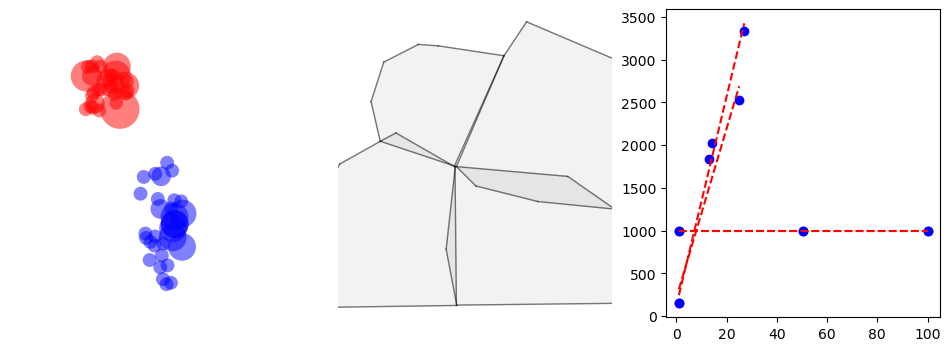

In [5]:
from multimodal_class import *
WORLD1.plotPRELIMINARIES(include_demand_curves=True);

# RUN SIMULATION

In [6]:
from multimodal_class import *
WORLD1.SIM(num_iters = 3, restart = True)

computing uncongested trip costs for mode drive ...
computing uncongested trip costs for mode walk ...
...segment number 0
...segment number 50
computing uncongested trip costs for mode gtfs ...
...segment number 0
...segment number 50
computing uncongested trip costs for mode ondemand ...
...segment number 0
...segment number 50
------------ Planning initial trips... ------------
person0 ...
------------------ITERATION 0 -----------
starting gtfs computations...
...with  56  active trips...
REMOVING MASS FROM GTFS TRIPS...
starting driving computations...
...with  0  active trips...
starting on-demand computations...
...with 0 active ondemand trips...
...average manifest trip time:  0.0
...expected num of trips given cost: 36.778261738845615
...actual num trips: 0
...adjusting cost estimate by -367.7826173884562
...changing cost est from 1000.0000000000001 to 1000.0
...with 26 active ondemand trips...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-16 00:07:05,535: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-16 00:07:06,238: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-16 00:07:06,934: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-16 00:07:06,935: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-16 00:07:06,935: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-16 00:07:06,936: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-16 00:07:06,937: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-16 00:07:06,938: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-16 00:07:06,941: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  2709.4444444444443
...expected num of trips given cost: 25.0
...actual num trips: 26
...adjusting cost estimate by 10.0
...changing cost est from 2688.355477855478 to 2698.355477855478
...with 0 active ondemand trips...
...average manifest trip time:  0.0
...expected num of trips given cost: 36.778261738845615
...actual num trips: 0
...adjusting cost estimate by -367.7826173884562
...changing cost est from 1000.0000000000001 to 1000.0
...with 28 active ondemand trips...


[osrm.py:35 - request_travel_time_matrix()]DEBUG2024-01-16 00:07:22,143: called
[osrm.py:78 - request_distance_matrix()]DEBUG2024-01-16 00:07:22,819: called
[optimizer.py:457 -              run_vrp()]DEBUG2024-01-16 00:07:23,534: VRP: Running VRP to return a Timetable
[optimizer.py:463 -              run_vrp()]DEBUG2024-01-16 00:07:23,535: VRP: Time Limit is 300
[optimizer.py:464 -              run_vrp()]DEBUG2024-01-16 00:07:23,535: VRP: time limit will be 300
[optimizer.py:467 -              run_vrp()]DEBUG2024-01-16 00:07:23,536: VRP: Create Routing Index Manager (pywrapcp.RoutingIndexManager) - Start
[optimizer.py:472 -              run_vrp()]DEBUG2024-01-16 00:07:23,536: VRP: Created Routing Index Manager
[optimizer.py:474 -              run_vrp()]DEBUG2024-01-16 00:07:23,537: VRP: Creating Routing Model (pywrapcp.RoutingModel) - Start
[optimizer.py:476 -              run_vrp()]DEBUG2024-01-16 00:07:23,538: VRP: Created Routing Model
[optimizer.py:490 -              run_vrp()]DEBU

...average manifest trip time:  1919.1538461538462
...expected num of trips given cost: 25.0
...actual num trips: 28
...adjusting cost estimate by 30.0
...changing cost est from 3179.4914529914545 to 3209.4914529914545
starting walking computations...
...with  62  active trips...
>>> segment 0 ...
updating individual choices...
person0 ...
iteration time:  33.705350160598755
------------------ITERATION 1 -----------
starting gtfs computations...
...with  11  active trips...
REMOVING MASS FROM GTFS TRIPS...
starting driving computations...
...with  0  active trips...
starting on-demand computations...
...with 0 active ondemand trips...
...average manifest trip time:  0.0
...expected num of trips given cost: 0.0
...actual num trips: 0
...adjusting cost estimate by 0.0
...changing cost est from 1000.0 to 1000.0
...with 0 active ondemand trips...
...average manifest trip time:  0.0
...expected num of trips given cost: 25.10116880628473
...actual num trips: 0
...adjusting cost estimate by -

### GENERATE OUTPUTS

In [ ]:
from multimodal_class import *
WORLD1.generateOutputs();

### SAVE OUTPUTS

In [ ]:
WORLD1.saveOutputs('OUTPUTS/run3')

####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT ####  END OF CURRENT 